    -redraw crosssection of salinity at the venus central node for aug 1 - oct 1 2016
    y 424 x 266
    
    ERRDAP result:
    
  <img src="y424x266.png">



In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools
from collections     import OrderedDict
from matplotlib      import animation, patches
from dateutil        import parser
import netCDF4 as nc

import matplotlib.pyplot as plt
import datetime          as dtm
import os
import cmocean 
import numpy as np

%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['axes.formatter.useoffset'] = False



In [4]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]

daypath = '/results/SalishSea/hindcast/01aug16/SalishSea_1d_20160801_20160801_grid_T.nc' 
t_d = nc.Dataset(daypath)
print(t_d)

sn = t_d.variables['vosaline']
print(sn.shape)
zlevels = t_d.variables['deptht']
t_s = sn[0,:,424,:]
print(t_s.shape)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1d_20160730_20160808
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.6
    timeStamp: 2017-Oct-17 21:59:56 GMT
    uuid: 4816355b-96cf-4130-9f23-3626f46d9355
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 sossheig(time_counter,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x), float32 buoy_n2(time_counter,deptht,y,x), float32 mixed_dept

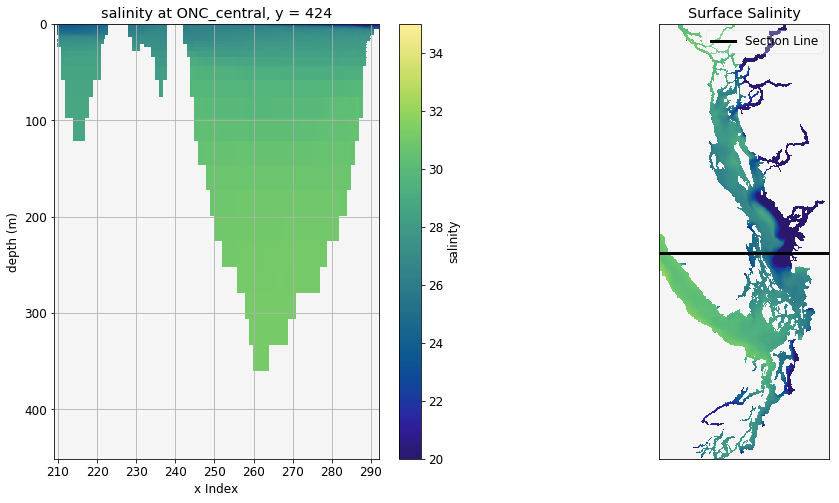

In [22]:
fig, (axl, axr) = plt.subplots(1, 2, figsize=(16, 8 ))
land_colour = 'whitesmoke'

# Define the component slice to plot
t, zmax, ylocn = -1, 41, 424
section_slice = np.arange(208, 293)

salinity = np.ma.masked_values(sn[0,:,424,section_slice],0)

cmap = cmocean.cm.haline
cmap.set_bad(land_colour)
mesh = axl.pcolormesh(
    section_slice[:], zlevels[:zmax], salinity,
    cmap=cmap, vmin=20, vmax=35,
)
axl.invert_yaxis()
cbar = fig.colorbar(mesh, ax=axl)
cbar.set_label('salinity')

# Axes labels and title
axl.set_xlabel('x Index')
axl.set_ylabel('depth (m)')
axl.set_title('salinity at ONC_central, y = 424')

# Axes limits and grid
axl.set_xlim(section_slice[1], section_slice[-1])
axl.set_ylim(zlevels[zmax - 2] + 10, 0)
axl.set_facecolor(land_colour)
axl.grid()

# Define surface current magnitude slice
x_slice = np.arange(0, 398)
y_slice = np.arange(0, 898)
line_s = np.arange(0,398)

surf_sal =  np.ma.masked_values(sn[0, 0, y_slice, x_slice], 0)

# Plot section line on surface streamlines map
viz_tools.set_aspect(axr)

mesh = axr.pcolormesh(surf_sal, cmap=cmocean.cm.haline, vmin = 20, vmax = 35)

axr.plot(
    line_s, 424*np.ones_like(line_s),
    linestyle='solid', linewidth=3, color='black',
    label='Section Line',
)

# Axes labels and title
axr.set_xlabel('')
axr.set_ylabel('')
axr.set_xticks([])
axr.set_yticks([])
axr.set_title('Surface Salinity')
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.grid()

In [29]:
tit1 = 'salinity at ONC_central, y = 424'
tit2 = 'Surface salinity'

def nice_CN_plot(tit1, tit2, plotdat,t):
    fig, (axl, axr) = plt.subplots(1, 2, figsize=(16, 8 ))
    land_colour = 'whitesmoke'

    # Define the component slice to plot
    t, zmax, ylocn = -1, 41, 424
    section_slice = np.arange(208, 293)

    salinity = np.ma.masked_values(plotdat[t,:,424,section_slice],0)

    cmap = cmocean.cm.haline
    cmap.set_bad(land_colour)
    mesh = axl.pcolormesh(
        section_slice[:], zlevels[:zmax], salinity,
        cmap=cmap, vmin=20, vmax=35,
    )
    axl.invert_yaxis()
    cbar = fig.colorbar(mesh, ax=axl)
    cbar.set_label('salinity')

    # Axes labels and title
    axl.set_xlabel('x Index')
    axl.set_ylabel('depth (m)')
    axl.set_title(tit1)

    # Axes limits and grid
    axl.set_xlim(section_slice[1], section_slice[-1])
    axl.set_ylim(zlevels[zmax - 2] + 10, 0)
    axl.set_facecolor(land_colour)
    axl.grid()

    # Define surface current magnitude slice
    x_slice = np.arange(0, 398)
    y_slice = np.arange(0, 898)
    line_s = np.arange(0,398)

    surf_sal =  np.ma.masked_values(plotdat[t, 0, y_slice, x_slice], 0)

    # Plot section line on surface streamlines map
    viz_tools.set_aspect(axr)

    mesh = axr.pcolormesh(surf_sal, cmap=cmocean.cm.haline, vmin = 20, vmax = 35)

    axr.plot(
        line_s, 424*np.ones_like(line_s),
        linestyle='solid', linewidth=3, color='black',
        label='Section Line',
    )

    # Axes labels and title
    axr.set_xlabel('')
    axr.set_ylabel('')
    axr.set_xticks([])
    axr.set_yticks([])
    axr.set_title(tit2)
    legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
    axr.grid()

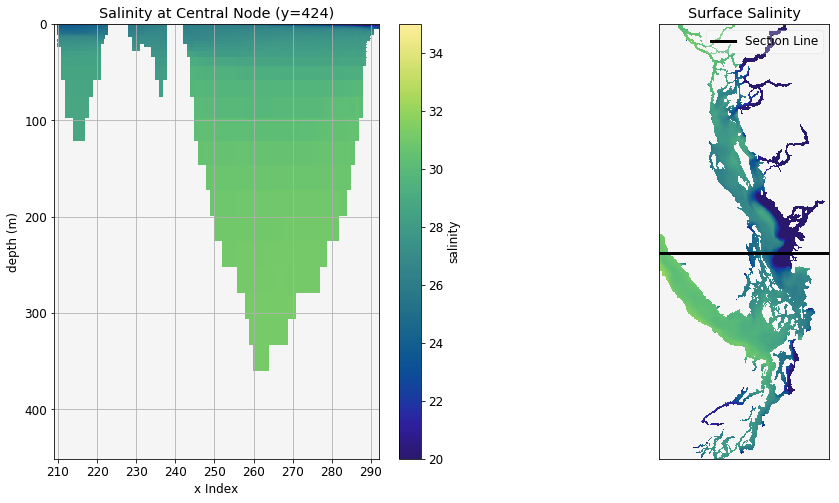

In [30]:
nice_CN_plot('Salinity at Central Node (y=424)', 'Surface Salinity', sn,0)